# IMT 511 PS 05: data programming

In [58]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

# read data

read in the data file 'weatherHistory.csv.bz2'.  Understand it's
structure.  Consult the companion text file for a brief variable
descriptions.

inspect a few lines of the data and find the number of rows and columns

Hint: use pd.sample(), pd.head(), pd.tail()

In [57]:
weather = pd.read_csv('weatherHistory.csv.bz2')
print('Number of rows and columns', weather.shape)
print('Column heads', weather.columns)
print('Rows:', weather.index)
print(weather)

Number of rows and columns (96453, 12)
Column heads Index(['time', 'summary', 'precip', 'temp', 'appTemp', 'humidity', 'wind',
       'bearing', 'visibility', 'cloudCover', 'pressumre', 'dailySummary'],
      dtype='object')
Rows: RangeIndex(start=0, stop=96453, step=1)
                                time        summary precip       temp  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy   rain   9.472222   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy   rain   9.355556   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy   rain   9.377778   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy   rain   8.288889   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy   rain   8.755556   
5      2006-04-01 05:00:00.000 +0200  Partly Cloudy   rain   9.222222   
6      2006-04-01 06:00:00.000 +0200  Partly Cloudy   rain   7.733333   
7      2006-04-01 07:00:00.000 +0200  Partly Cloudy   rain   8.772222   
8      2006-04-01 08:00:00.000 +0200  Partly Cloudy   rain  10.822222   

## Select 2015 observations only

Select only observations for 2015.

Hint: 'time' is of a string data type (well, it is a Series of
string).  Use string methods to select 2015 data only.

Hint2: you have to use `.str` attribute to get a string out of series.

Hint3: don't just make a subset, make a copy of subset.

Find how many observations are there for 2015 only.

In [68]:
weatherInfo = weather[weather.time.str.startswith('2015')].copy()
print('Number of observations for 2015:', weatherInfo.shape)
print(weatherInfo)


Number of observations for 2015: (8760, 12)
                                time                   summary precip  \
78909  2015-04-01 00:00:00.000 +0200                  Overcast   rain   
78910  2015-04-01 01:00:00.000 +0200       Breezy and Overcast   rain   
78911  2015-04-01 02:00:00.000 +0200                  Overcast   rain   
78912  2015-04-01 03:00:00.000 +0200                  Overcast   rain   
78913  2015-04-01 04:00:00.000 +0200                  Overcast   rain   
78914  2015-04-01 05:00:00.000 +0200             Mostly Cloudy   rain   
78915  2015-04-01 06:00:00.000 +0200             Mostly Cloudy   rain   
78916  2015-04-01 07:00:00.000 +0200             Partly Cloudy   rain   
78917  2015-04-01 08:00:00.000 +0200             Mostly Cloudy   rain   
78918  2015-04-01 09:00:00.000 +0200             Mostly Cloudy   rain   
78919  2015-04-01 10:00:00.000 +0200  Breezy and Partly Cloudy   rain   
78920  2015-04-01 11:00:00.000 +0200             Partly Cloudy   rain   
78921  

## Create a new variable 'timestamp' which is variable 'time'
## converted to datetime type

Hint: use Pandas.to_datetime
(code given, adjust variable names)

In [64]:
weatherInfo['timestamp'] = pd.to_datetime(weatherInfo.time)

## Sort data by date

This data is in an arbitrary order.  Ensure it is ordered by time

Hint: use Pandas.sort_values method

In [66]:
orgTimestamp = weatherInfo.sort_values('timestamp')
print(orgTimestamp)

                                time        summary precip       temp  \
81789  2015-01-01 00:00:00.000 +0100          Clear   snow -12.650000   
81790  2015-01-01 01:00:00.000 +0100  Mostly Cloudy   snow -13.066667   
81791  2015-01-01 02:00:00.000 +0100          Clear   snow -11.994444   
81792  2015-01-01 03:00:00.000 +0100  Mostly Cloudy   snow -10.933333   
81793  2015-01-01 04:00:00.000 +0100  Partly Cloudy   snow  -9.705556   
81794  2015-01-01 05:00:00.000 +0100          Clear   snow  -9.822222   
81795  2015-01-01 06:00:00.000 +0100  Partly Cloudy   snow  -9.822222   
81796  2015-01-01 07:00:00.000 +0100  Mostly Cloudy   snow  -9.050000   
81797  2015-01-01 08:00:00.000 +0100          Clear   snow  -7.700000   
81798  2015-01-01 09:00:00.000 +0100          Clear   snow  -7.122222   
81799  2015-01-01 10:00:00.000 +0100  Mostly Cloudy   snow  -5.366667   
81800  2015-01-01 11:00:00.000 +0100          Clear   snow  -4.950000   
81801  2015-01-01 12:00:00.000 +0100          Clear

# Noon temperature only

Select a subset from your 2015 data that only contains data for noon
(12:00:00).

Hint: you can either find a string, corresponding to noon, in the
string variable 'time', or extract hour from the timestamp like this:
`w15.timestamp.apply(lambda x: x.hour)`
This example code creates a variable that is only the hour (0-23).

In [37]:
weatherInfo.timestamp.apply (lambda x: x.hour)
weather2015noon = weatherInfo[weatherInfo.time.str.contains(' 12:00:00', regex=False)].copy()
print(weather2015noon.shape)
print(weather2015noon.head(5))

(365, 13)
                                time                   summary precip  \
78921  2015-04-01 12:00:00.000 +0200  Breezy and Partly Cloudy   rain   
78945  2015-04-10 12:00:00.000 +0200             Mostly Cloudy   rain   
78969  2015-04-11 12:00:00.000 +0200             Partly Cloudy   rain   
78993  2015-04-12 12:00:00.000 +0200             Partly Cloudy   rain   
79017  2015-04-13 12:00:00.000 +0200             Partly Cloudy   rain   

            temp    appTemp  humidity     wind  bearing  visibility  \
78921  12.127778  12.127778      0.46  34.9692    299.0      9.9820   
78945  17.222222  17.222222      0.24   4.8783    118.0     16.1000   
78969  18.977778  18.977778      0.37   4.9266    216.0     16.1000   
78993  22.177778  22.177778      0.33  14.2968    358.0     16.1000   
79017  22.216667  22.216667      0.33  16.0356    278.0     10.2557   

       cloudCover  pressumre  \
78921         0.0    1010.27   
78945         0.0    1029.18   
78969         0.0    1023.25

# make a plot

Make a plot that depicts the temperature through 2015
Add a descriptive title, label the axis.  Use a good font size. 
Use a non-default line color for the plot.

Text(0, 0.5, 'Temperature')

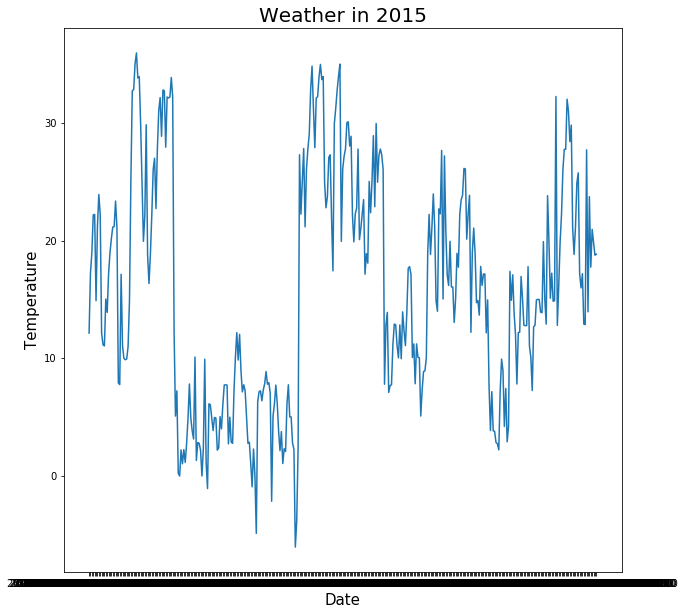

In [67]:
plt.figure(figsize=(10,10))
plt.plot(weather2015noon.time, weather2015noon.temp)
plt.title('Weather in 2015',{'fontsize':20})
plt.xlabel('Date', {'fontsize':15})
plt.ylabel('Temperature', {'fontsize':15})